In [1]:
#importing libraries
from os import path
from keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, MaxPooling1D
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
#pre-processing csv file
def preprocessing(filepath):
    file=pd.read_csv(filepath)
    file=file.sample(frac=1)#shuffling the dataset
    label=file.Class.tolist()
    encoder = LabelEncoder()
    label1 = encoder.fit_transform(label)#encoding the string attribute of classes to numbers
    file=file.drop(columns=['filename'])
    file=file.drop(columns=['Class'])
    file=file.to_numpy()
    file=np.reshape(file,(file.shape[0],file.shape[1],1))
    for i in range(100):
        print(label[i],"------>", label1[i])
    return file , label1 #the final file along with the label

In [3]:
carnatic,label_carnatic=preprocessing('/home/karrthik/Projects/dnn/csv/carnatic_final.csv')

Flute ------> 0
Violin ------> 4
Nadaswaram ------> 2
Violin ------> 4
Flute ------> 0
Violin ------> 4
Veena ------> 3
Mandolin ------> 1
Violin ------> 4
Mandolin ------> 1
saxophone ------> 5
Veena ------> 3
saxophone ------> 5
Violin ------> 4
Violin ------> 4
saxophone ------> 5
Violin ------> 4
Violin ------> 4
Veena ------> 3
Flute ------> 0
Violin ------> 4
Mandolin ------> 1
Nadaswaram ------> 2
Violin ------> 4
Violin ------> 4
Mandolin ------> 1
Violin ------> 4
saxophone ------> 5
saxophone ------> 5
Violin ------> 4
Violin ------> 4
Nadaswaram ------> 2
Violin ------> 4
Violin ------> 4
Violin ------> 4
Veena ------> 3
Nadaswaram ------> 2
Violin ------> 4
Violin ------> 4
Violin ------> 4
saxophone ------> 5
Veena ------> 3
saxophone ------> 5
Violin ------> 4
Violin ------> 4
Violin ------> 4
Veena ------> 3
Flute ------> 0
Violin ------> 4
Violin ------> 4
saxophone ------> 5
Flute ------> 0
Violin ------> 4
Violin ------> 4
Flute ------> 0
Veena ------> 3
saxophone ---

In [4]:

def Conv_Neural_Net(x_train,y_train):
    #x_train=Image_Data
    #y_train=Label_Data
    
    #create model
    model = Sequential()
    #add model layers
    model.add(layers.Conv1D(32,3, activation = "relu",padding = 'same', input_shape=(26,1)))
    model.add(layers.Conv1D(64,3,activation = 'relu',padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation = 'relu'))
    model.add(layers.Dense(20,activation = 'softmax'))
    model.summary()
    
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    #train the model
    history=model.fit(x_train, y_train, validation_split =0.40, epochs=20)
    return model, history

In [28]:
cnn_carnatic1,history = Conv_Neural_Net(carnatic,label_carnatic)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 26, 32)            128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 26, 64)            6208      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1664)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1664)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                106560    
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1300      
Total params: 114,196
Trainable params: 114,196
Non-trainable params: 0
________________________________________________

In [123]:
cnn_carnatic.fit(carnatic, label_carnatic, validation_split =0.40, epochs=1)

Epoch 1/10
53/53 [==============================] - 1s 15ms/step - loss: 0.2480 - accuracy: 0.9142 - val_loss: 0.2176 - val_accuracy: 0.9432
Epoch 2/10
53/53 [==============================] - 1s 15ms/step - loss: 0.2180 - accuracy: 0.9249 - val_loss: 0.2657 - val_accuracy: 0.9290
Epoch 3/10
53/53 [==============================] - 1s 14ms/step - loss: 0.2214 - accuracy: 0.9266 - val_loss: 0.2214 - val_accuracy: 0.9343
Epoch 4/10
53/53 [==============================] - 1s 15ms/step - loss: 0.2052 - accuracy: 0.9343 - val_loss: 0.1909 - val_accuracy: 0.9494
Epoch 5/10
53/53 [==============================] - 1s 14ms/step - loss: 0.1721 - accuracy: 0.9521 - val_loss: 0.1856 - val_accuracy: 0.9432
Epoch 6/10
53/53 [==============================] - 1s 14ms/step - loss: 0.2301 - accuracy: 0.9308 - val_loss: 0.2420 - val_accuracy: 0.9335
Epoch 7/10
53/53 [==============================] - 1s 14ms/step - loss: 0.1622 - accuracy: 0.9491 - val_loss: 0.1933 - val_accuracy: 0.9335
Epoch 8/10
53

In [39]:
#model_raga=loaded_model
df=pd.read_csv('/home/karrthik/Projects/dnn/csv/saxophone_test.csv')
file = df.copy()
#file=file.drop(columns=['filename'])
#file=file.drop(columns=['raga'])
file=file.to_numpy()
test1=np.reshape(file,(file.shape[0],file.shape[1],1))
y_prediction=np.argmax(cnn_carnatic.predict(test1), axis=-1)
y_prediction

array([4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

In [ ]:
#saving the model as a json file with weights in h5 format
model_json = model_raga.to_json()
with open("/home/green/Projects/dnn/model/rnn_instrument.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_raga.save_weights("/home/green/Projects/dnn/model/rnn_instrument.h5")
print("Saved model to disk")

In [ ]:
for i in y_prediction:
    if i//1==0:
        print('Purvikalyani')
    if i//1==1:
        print('bahudari')
    if i//1==2:
        print('bauli')
    if i//1==3:
        print('behag')
    if i//1==4:
        print('brindavana saranga')
    if i//1==5:
        print('gambhira nata')
    if i//1==6:
        print('hamsadhvani')
    if i//1==7:
        print('kalyani')
    if i//1==8:
        print('kapi')
    if i//1==9:
        print('madyamavati')
    if i//1==10:
        print('natakurinji')
    if i//1==11:
        print('ragamalika ')
    if i//1==12:
        print('riti gaula')
    if i//1==13:
        print('saramathi ')
    if i//1==14:
        print('sindhubhairavi ')
    if i//1==15:
        print('yamuna kalyani')
"change according to wha"

In [ ]:
for i in y_prediction_c:
    if i==0:
        print('flute')
    if i==1:
        print('veena')
    if i==2:
        print('violin')

In [ ]:
for i in y_prediction_h:
    if i//1==0:
        print('bansuri')
    if i//1==1:
        print('santoor')
    if i//1==2:
        print('sarangi')
    if i//1==3:
        print('sarod')
    if i//1==4:
        print('shehnai')
    if i//1==5:
        print('sitar')
    if i//1==6:
        print('violin')
  

In [19]:
y_prediction_raga=np.argmax(cnn_carnatic.predict(carnatic), axis=-1)
y_prediction_raga
C=confusion_matrix(label_carnatic, y_prediction_raga)
K=((C / C.astype(np.float).sum(axis=1))*100)
for i in range (5):
    print(K[i][i])

98.48942598187311
98.30508474576271
99.16666666666667
98.68667917448406
99.39531368102796


<AxesSubplot:>

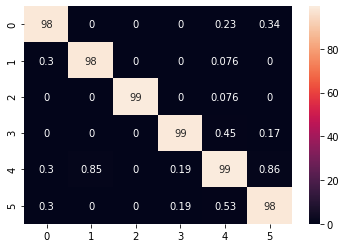

In [20]:
sns.heatmap(K, annot=True)

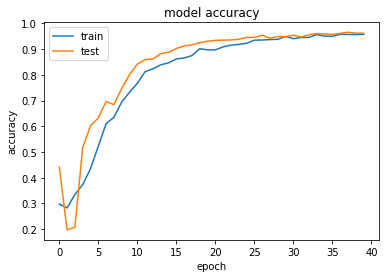

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

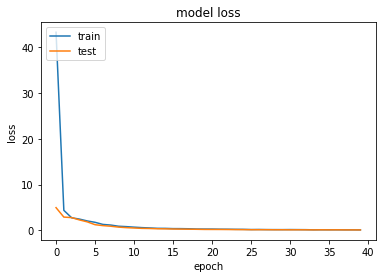

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()